### Análise de tipo morfológico em galáxias do universo local (Catálogo $S^4G$)

Informação importante:

A classificação morfológica no catálogo $S^4G$ é feita no ótico e a decomposição (Salo et al. 2015) é no Mid_IR. Talvez isso possa influenciar na classifcação morfológica da galáxia, mas não muda-la totalmente.


- Análise Geral

Olhando para todas as galáxias do $S^4G$:
. Quantas espirais temos? Quantas possuem barra? -- Amostra completa e diferentes cortes de massa 

. Histograma do tipo morfológico (type) -- Amostra completa e diferentes cortes de massa 

- Amostra de galáxias que possuem barra na decomposição -- Salo et al. 2015

. Tipo morfologico para diferentes cortes de massa -- Todas galaxias nessa amostra possuem barra em sua decomposição, mas quantas são espirais barradas? 

. Histograma do tipo morfológico (type) 


- Análise nas galáxias que estudamos a distribuição de massa

Essa amostra é bem menor e possui alguns cortes: inclinação < 65 (caracterizar bem a barra -- galáxias muito inclinadas dificultam a determinação de uma barra), possuir barra na decomposição, qualidade de decomposição = 5 (alguns fatores podem afetar a decomposição -- ex: objetos na frente da galáxia). 

. Tipo morfologico para diferentes cortes de massa -- Além de todas galáxias possuirem componente barra nessa amostra, elas tem boa qualidade de decomposição e inclinação ideal para uma boa determinação da barra. Quantas nessa amostra são espirais barradas?

. Histograma do tipo morfológico (type) -- Amostra completa e diferentes cortes de massa 


-- -- -- -- 

- Respondendo algumas questões importantes
 
. Ao fazer essa análise sabemos quantas barras recuperamos com a decomposição. Nem toda galáxia com componente barra possui barra? Temos componente barra em galáxias com tipo morfológico que não esperaríamos uma barra? O quanto a componente barra na decomposição é de fato fiel a galáxia possuir ou não barra? 

. Estamos ficando mais com as SB?

. O quanto de barras a decomposição (Salo et al. 2015) recupera? (Quantas galáxias com componente barra são de fato espirais barradas?)


-- -- -- -- 


Descrição da tabela do $S^4G$: https://irsa.ipac.caltech.edu/data/SPITZER/S4G/gator_docs/s4g_colDescriptions.html#type

Sobre tipo morfologico: http://leda.univ-lyon1.fr/leda/param/type.html


In [1]:
import numpy as np
import pandas as pd
import astropy.units as u
import matplotlib.pyplot as plt

from nim_irgalaxies import analise_espirais

Primeiro, vamos abrir nossa tabela já com o formato data frame. Essa tabela é o match entre 3 catálogos. Salo et al. 2015 + IRSA $S^4G$ + Bouquin et al. 2018.

Essa tabela possui 4629 linhas para 2352 galáxias. A quantidade extra de linhas se deve ao fato de uma galáxia poder possuir mais de uma componente. Temos uma linha por componente, por isso dependendo da galáxia teremos mais de uma linha para ela.

Isso acontece apenas para as primeira colunas, que são da tabela Salo et al. 2015 que fez a decomposição das galáxias do $S^4G$ na banda de $3.6 \mu m$. Assim temos uma linha para cada componente daquela galáxia. O restante das colunas, os dados nas linhas para uma mesma galáxia são iguais.

In [2]:
Salo_S4G = pd.read_csv('Salo15(4629)+IRSA_S4G(2352)+Bouquin18(1931).csv')

/home/nimusagi/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
Salo_S4G  #Aqui podemos visualizar o que foi dito. A primeira galáxia possui 2 componentes (bojo e edgedisk)
#Para a as colunas dedicadas aos dados do bojo, temos dados. As restantes, teremos NaN.
#O mesmo ocorre com o edgedisk

,#Seq,Name_1,Mod,Nc,Q,C,Fn,f1,mag1_1,q1,...,Dist,e_Dist,FUVmag,e_FUVmag,NUVmag,e_NUVmag,_3_6mag,GroupID,GroupSize,Separation
0,#0,1,2,3,4,5,6,7.000,8.000,9.000,...,136.0,137.0,138.00,139.00,140.00,141.00,142.000,143.0,144.0,145.000000
1,1,ESO011-005,_bz,2,4,B,sersic,0.571,14.822,0.354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,ESO011-005,_bz,2,4,Z,edgedisk,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,ESO012-010,_dbar,2,5,D,expdisk,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,ESO012-010,_dbar,2,5,BAR,ferrer2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,2351,UGC12857,_zzn,3,4,Z,edgedisk,NaN,NaN,NaN,...,36.7,2.5,16.72,0.01,16.29,0.01,13.086,1454.0,3.0,0.053437
4626,2351,UGC12857,_zzn,3,4,Z,edgedisk,NaN,NaN,NaN,...,36.7,2.5,16.72,0.01,16.29,0.01,13.086,1454.0,3.0,0.053437
4627,2351,UGC12857,_zzn,3,4,N,psf,NaN,NaN,NaN,...,36.7,2.5,16.72,0.01,16.29,0.01,13.086,1454.0,3.0,0.053437
4628,2352,UGC12893,_bd,2,5,B,sersic,0.021,17.826,0.786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Para a tabela Salo_S4G -- Nossas colunas de interesse são: 
Colunas_interesse = Salo_S4G[['Name_1','Mod','Q','C','mstar','type','t_1','incl']] #Escolhendo essas colunas 

#Tirando os NaNs das colunas que precisamos ter valores
s4g_nonan = Colunas_interesse.dropna(subset = ['mstar' ,'type', 't_1','incl'])

print(len(Colunas_interesse),len(s4g_nonan)) #Quantas linhas temos antes de tirar as linhas duplicadas

4630 4614


In [5]:
s4g_nonan #Agora temos apenas as colunas que de fato são úteis para essa análise

,Name_1,Mod,Q,C,mstar,type,t_1,incl
0,1,2,4,5,62.000,68,73.0,109.00
1,ESO011-005,_bz,4,B,9.749,SBc,5.9,83.91
2,ESO011-005,_bz,4,Z,9.749,SBc,5.9,83.91
3,ESO012-010,_dbar,5,D,9.632,SBd,7.7,26.82
4,ESO012-010,_dbar,5,BAR,9.632,SBd,7.7,26.82
...,...,...,...,...,...,...,...,...
4625,UGC12857,_zzn,4,Z,10.005,Sbc,4.0,90.00
4626,UGC12857,_zzn,4,Z,10.005,Sbc,4.0,90.00
4627,UGC12857,_zzn,4,N,10.005,Sbc,4.0,90.00
4628,UGC12893,_bd,5,B,8.991,Sd,8.4,29.49


In [6]:
s4g_comps = s4g_nonan.drop(index=0) #Removendo a primeira linha, que é apenas um indice que eu uso para me
#orientar com as colunas na tabela completa, pois são muitas colunas

s4g_2267 = s4g_comps.drop_duplicates(subset='Name_1') #2268

Acima temos duas tabelas. Uma preserva as componentes que serão uteis na análise. A outra pega apenas uma linha por galáxia para não termos dados duplicados. 

In [7]:
s4g_comps 
# a coluna Mod possui o modelo de decomposição final. 
# a coluna Q contem informação sobre a qualidade da decomposição. Essa varia de 1 - 5. várias coisas podem 
# afetar a decomposição, como por exemplo objetos na frente da galáxia.
# a coluna C é a componente da linha. ex: B - bojo, Z - edgedisk, D - disk, BAR - barra... 

,Name_1,Mod,Q,C,mstar,type,t_1,incl
1,ESO011-005,_bz,4,B,9.749,SBc,5.9,83.91
2,ESO011-005,_bz,4,Z,9.749,SBc,5.9,83.91
3,ESO012-010,_dbar,5,D,9.632,SBd,7.7,26.82
4,ESO012-010,_dbar,5,BAR,9.632,SBd,7.7,26.82
5,ESO012-014,_dbar,4,D,9.023,SBm,9.0,90.00
...,...,...,...,...,...,...,...,...
4625,UGC12857,_zzn,4,Z,10.005,Sbc,4.0,90.00
4626,UGC12857,_zzn,4,Z,10.005,Sbc,4.0,90.00
4627,UGC12857,_zzn,4,N,10.005,Sbc,4.0,90.00
4628,UGC12893,_bd,5,B,8.991,Sd,8.4,29.49


In [8]:
s4g_2267
# Essa tabela possui apenas uma linha por galáxia, e o motivo dela são as outras colunas:
# mstar -- massa estelar da galáxia em log10. Faremos uma análise por corte da massa.
# type -- tipo morfológico.
# t_1 -- hubble t type
# incl -- inclinação da galáxia. Utilizada para o corte da minha amostra pois se a galáxia é muito inclinada
# torna-se difícil dizer se de fato há uma barra nela.

,Name_1,Mod,Q,C,mstar,type,t_1,incl
1,ESO011-005,_bz,4,B,9.749,SBc,5.9,83.91
3,ESO012-010,_dbar,5,D,9.632,SBd,7.7,26.82
5,ESO012-014,_dbar,4,D,9.023,SBm,9.0,90.00
7,ESO013-016,_dbarf,5,D,9.564,SBd,7.5,56.71
9,ESO015-001,_dbar,5,D,8.806,IB,9.8,90.00
...,...,...,...,...,...,...,...,...
4621,UGC12791,_d,5,D,8.190,I,9.9,90.00
4622,UGC12846,_d,5,D,8.687,SABm,8.7,25.66
4623,UGC12856,_dbar,5,D,9.080,IB,9.6,90.00
4625,UGC12857,_zzn,4,Z,10.005,Sbc,4.0,90.00


Vamos separar nossa amostra em diferentes cortes de massa e então vamos analisar o tipo morfológico para a amostra como um todo e para os diferentes cortes.

In [9]:
#Os cortes de massa
s4g_m9 = s4g_2267[s4g_2267.mstar < 9] #massa menor que 10^9 -- galáxias anãs
s4g_m9_m10 = s4g_2267[s4g_2267.mstar >= 9][s4g_2267.mstar < 10]
s4g_m10 = s4g_2267[s4g_2267.mstar >= 10]

print('Número de galáxias anãs (Msun < 10^9): ','  ',len(s4g_m9),
      '\nNúmero de galáxias (10^9 < Msun < 10^10): ', len(s4g_m9_m10),
      '\nNúmero de galáxias (10^10 < Msun): ','      ',len(s4g_m10))

Número de galáxias anãs (Msun < 10^9):     435 
Número de galáxias (10^9 < Msun < 10^10):  963 
Número de galáxias (10^10 < Msun):         869


/tmp/ipykernel_21848/1053077280.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  s4g_m9_m10 = s4g_2267[s4g_2267.mstar >= 9][s4g_2267.mstar < 10]


## Análise Geral

Olhando para todas as galáxias do $S^4G$:
. Quantas espirais temos? Quantas possuem barra? -- Amostra completa e diferentes cortes de massa 

. Histograma do tipo morfológico (type) -- Amostra completa e diferentes cortes de massa 

Lembrando que SB indica espiral com barra forte e SAB com barra intermediária.

Amostra de 2267 galáxias

Em nossa amostra de:  2267 galáxias temos:  2035 galáxias espirais
onde:  816 possuem uma barra
sendo :  521 são barras fortes

Porcentagem de galaxias espirais barradas:  35.995
Porcentagem de galaxias espirais SB:  22.982




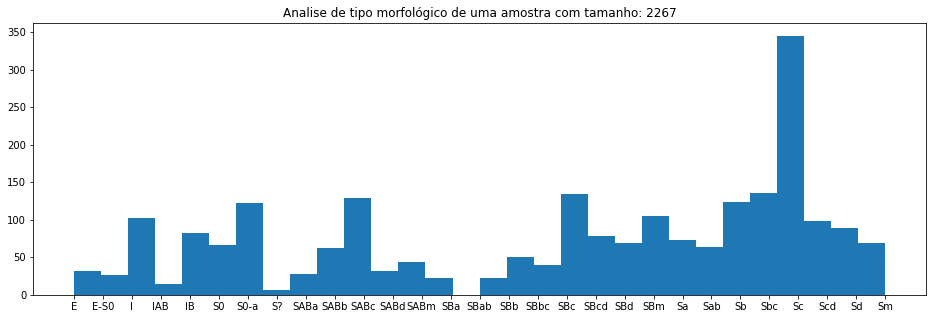

In [10]:
analise_espirais(column_type = s4g_2267.type , plot=True)

A maior parte da amostra é de espirais, no entanto vemos uma fração abaixo do esperado para espirais com barra, temos 36% e esperaríamos ~ 65% espirais barradas(i.e., 65% de Vaucouleurs,Menendéz-Delmestre et al. 2007). 

Esse valor de ~65% considera espirais barradas mais massivas, por isso análise de massa pode nos trazer informações a mais. 

Será que as barras da nossa amostra $S^4G$ estão mais presentes nas galáxias mais massivas? 

Vamos seguir a análise  olhando para os cortes de massa.

### 435 galáxias anãs ($M < 10^9 Msun$)

Amostra de 435 galáxias

Em nossa amostra de:  435 galáxias temos:  298 galáxias espirais
onde:  142 possuem uma barra
sendo :  105 são barras fortes

Porcentagem de galaxias espirais barradas:  32.644
Porcentagem de galaxias espirais SB:  24.138




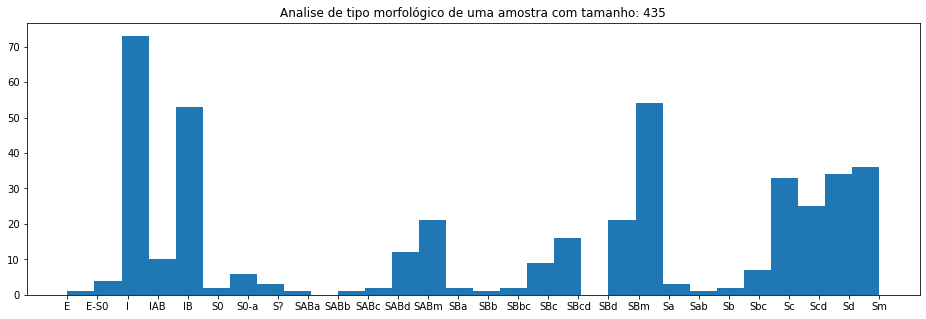

In [11]:
analise_espirais(column_type = s4g_m9.type , plot=True)

### 963 galáxias ($10^9 Msun < M < 10^{10} Msun$) 

Amostra de 963 galáxias

Em nossa amostra de:  963 galáxias temos:  894 galáxias espirais
onde:  394 possuem uma barra
sendo :  284 são barras fortes

Porcentagem de galaxias espirais barradas:  40.914
Porcentagem de galaxias espirais SB:  29.491




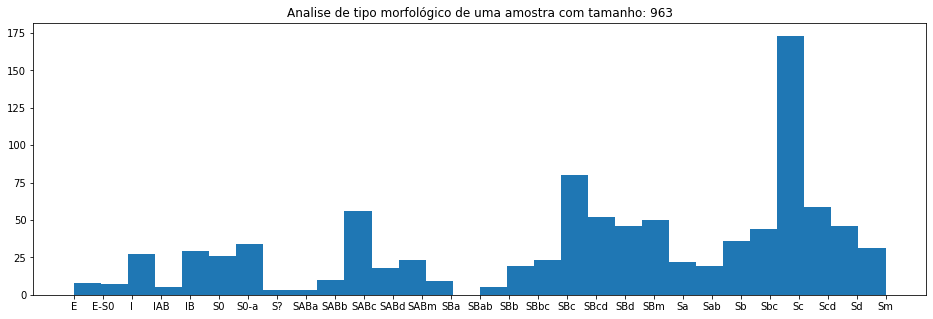

In [12]:
analise_espirais(column_type = s4g_m9_m10.type , plot=True)

### 869 galáxias ($M > 10^{10} Msun$)

Amostra de 869 galáxias

Em nossa amostra de:  869 galáxias temos:  843 galáxias espirais
onde:  280 possuem uma barra
sendo :  132 são barras fortes

Porcentagem de galaxias espirais barradas:  32.221
Porcentagem de galaxias espirais SB:  15.190




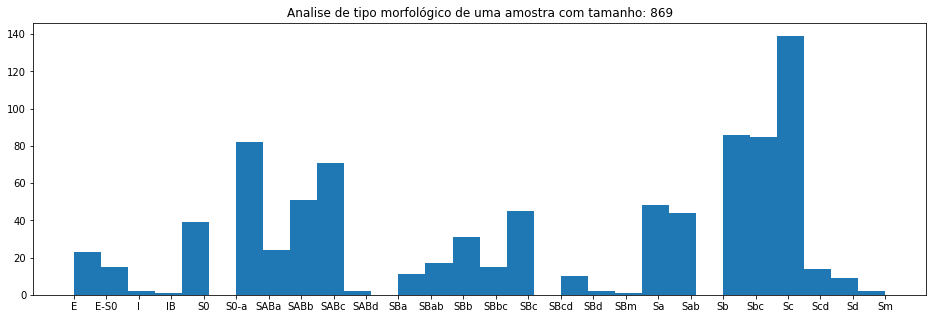

In [13]:
analise_espirais(column_type = s4g_m10.type , plot=True)

Amostra de 1832 galáxias

Em nossa amostra de:  1832 galáxias temos:  1737 galáxias espirais
onde:  674 possuem uma barra
sendo :  416 são barras fortes

Porcentagem de galaxias espirais barradas:  36.790
Porcentagem de galaxias espirais SB:  22.707




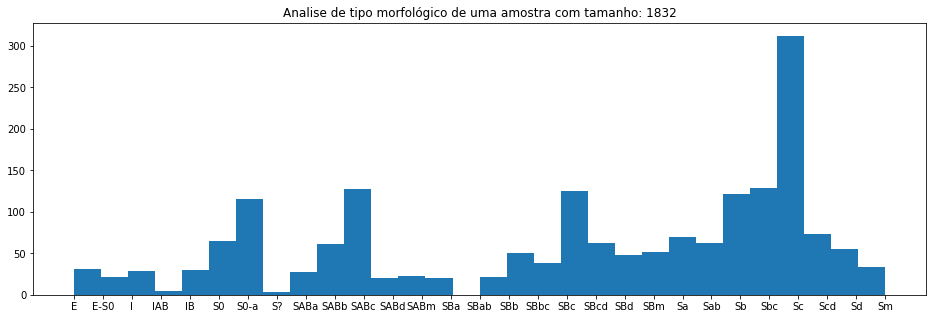

In [14]:
s4g_m9m = s4g_2267[s4g_2267.mstar >= 9]
analise_espirais(column_type = s4g_m9m.type , plot=True)

Considerando que que a porcentagem de barras em espirais na amostra do $S^4G$ seja aproximadamente 36%, vemos que de fato anãs possuem menos barra nas espirais ( 32.6%) e são mais irregulares (tipos I).

A amostra de massa intermediária ($10^9 < M < 10^{10}$)  é a que mais possui espirais barradas ( 40.9%). As barras em espirais diminuem ( 32.2%) se olharmos apenas para um corte de massa mais alto ($M > 10^{10}$).

Se considerarmos como massivas todas as galáxias com massa $M > 10^9$, a porcentagem de barras em espirais vai para 36.8%, o que é muito pouco acima do valor considerando a amostra total e ainda é bem baixo se considerarmos o valor de ~65%.

----

Uma inclinação < 65 graus ajuda numa boa determinação de barra na galáxia, pois se ela for muito inclinada fica difícil ter certeza se a componente está presente. 

Como os tipos morfológicos variam se aplicarmos esse critério na amostra como um todo?

In [16]:
s4g_2267_i65 = s4g_2267[s4g_2267.incl < 65]

print(s4g_2267_i65)

          Name_1      Mod  Q  C  mstar  type  t_1   incl
3     ESO012-010    _dbar  5  D  9.632   SBd  7.7  26.82
7     ESO013-016   _dbarf  5  D  9.564   SBd  7.5  56.71
11    ESO026-001   _ndbar  5  D  9.373   SBc  5.9  30.39
14    ESO027-001   _bdbar  5  B  9.999   SBc  5.0  36.30
19    ESO048-017   _ndbar  5  D  9.202  SBcd  6.9  62.52
...          ...      ... .. ..    ...   ...  ...    ...
4614    UGC12707  _dbarfn  5  D  9.611   Sbc  3.9  57.72
4617    UGC12709    _dbar  5  D  9.528  SABm  8.7  58.74
4619    UGC12732    _dbar  5  D  8.703  SABm  8.7  26.57
4622    UGC12846       _d  5  D  8.687  SABm  8.7  25.66
4628    UGC12893      _bd  5  B  8.991    Sd  8.4  29.49

[1013 rows x 8 columns]


### Amostra completa considerando o critério de inclinação < 65

Amostra de 1013 galáxias

Em nossa amostra de:  1013 galáxias temos:  900 galáxias espirais
onde:  378 possuem uma barra
sendo :  187 são barras fortes

Porcentagem de galaxias espirais barradas:  37.315
Porcentagem de galaxias espirais SB:  18.460




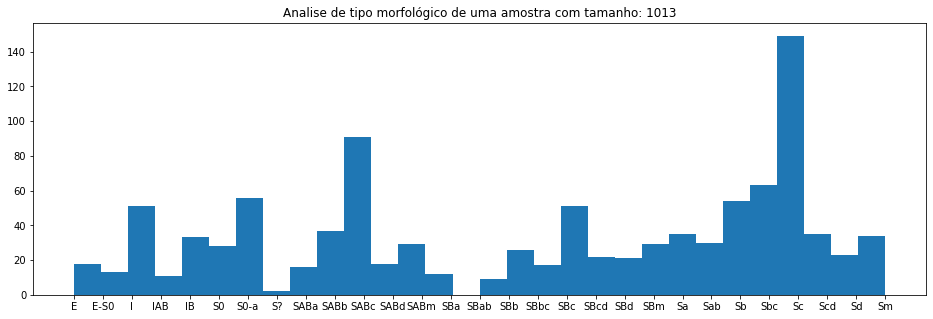

In [17]:
analise_espirais(column_type = s4g_2267_i65.type , plot=True)

### Amostra com $M > 10^9 Msun$ com critério de inclinação < 65

Amostra de 876 galáxias

Em nossa amostra de:  876 galáxias temos:  820 galáxias espirais
onde:  341 possuem uma barra
sendo :  173 são barras fortes

Porcentagem de galaxias espirais barradas:  38.927
Porcentagem de galaxias espirais SB:  19.749




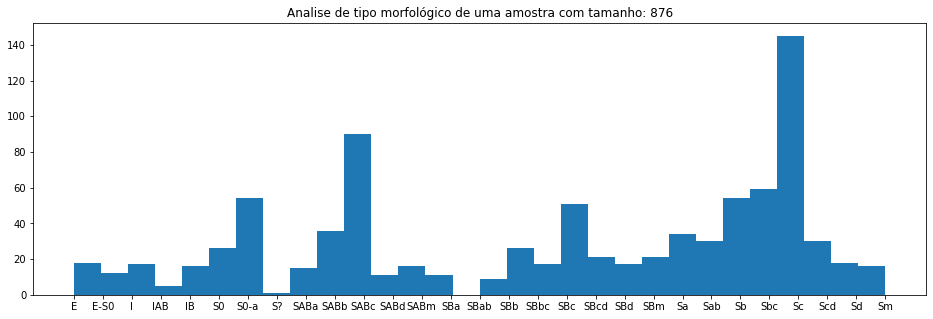

In [41]:
s4g_2267_i65_m9m = s4g_2267_i65[s4g_2267_i65.mstar >= 9]
analise_espirais(column_type = s4g_2267_i65_m9m.type , plot=True)

Vemos que o valor aumenta porém muito pouco. Olhando para as espirais massivas ($M > 10^9 Msun$) vemos que 39% possuem barra, o que ainda é bem menor do que o valor esperado ( ~65%).

## Amostra de galáxias que possuem barra na decomposição -- Salo et al. 2015

Motivação: Em Salo et al. 2015 temos: "Note that “barred”/“non-barred” refers here to whether or not a bar component was included to the the ﬁnal decomposition model, not to any morphological classiﬁcation; for example a non-barred BD model has been adopted for NGC 5985, which has a SAB family classiﬁcation", que é a última frase da "5. DECOMPOSITION PARAMETERS". 

Isso nos gera perguntas: Olhando para as galáxias que possuem barra em sua decomposição, quantas são de fato espirais barradas? O quanto de barras a decomposição recupera? 

----

Seguimos então com nossa análise, agora olhando apenas para galáxias com componente barra em sua decomposição.

. Tipo morfologico para diferentes cortes de massa -- Todas galaxias nessa amostra possuem barra em sua decomposição, mas quantas são espirais barradas? 

. Histograma do tipo morfológico (type) 

In [23]:
#Voltamos então para a tabela com uma linha para cada componente. Vamos separar nossa amostra de interesse.

mask_bar = 'BAR' == s4g_comps['C'] #Criando uma máscara para as galáxias que possuem comp barra

s4g_comps_bar = s4g_comps[mask_bar]
print(s4g_comps_bar)

          Name_1      Mod  Q    C  mstar  type  t_1   incl
4     ESO012-010    _dbar  5  BAR  9.632   SBd  7.7  26.82
6     ESO012-014    _dbar  4  BAR  9.023   SBm  9.0  90.00
8     ESO013-016   _dbarf  5  BAR  9.564   SBd  7.5  56.71
10    ESO015-001    _dbar  5  BAR  8.806    IB  9.8  90.00
12    ESO026-001   _ndbar  5  BAR  9.373   SBc  5.9  30.39
...          ...      ... ..  ...    ...   ...  ...    ...
4611    UGC12681   _dbarf  5  BAR  9.043  SBbc  4.2  54.14
4615    UGC12707  _dbarfn  5  BAR  9.611   Sbc  3.9  57.72
4618    UGC12709    _dbar  5  BAR  9.528  SABm  8.7  58.74
4620    UGC12732    _dbar  5  BAR  8.703  SABm  8.7  26.57
4624    UGC12856    _dbar  5  BAR  9.080    IB  9.6  90.00

[870 rows x 8 columns]


Amostra de 870 galáxias

Em nossa amostra de:  870 galáxias temos:  835 galáxias espirais
onde:  408 possuem uma barra
sendo :  291 são barras fortes

Porcentagem de galaxias espirais barradas:  46.897
Porcentagem de galaxias espirais SB:  33.448




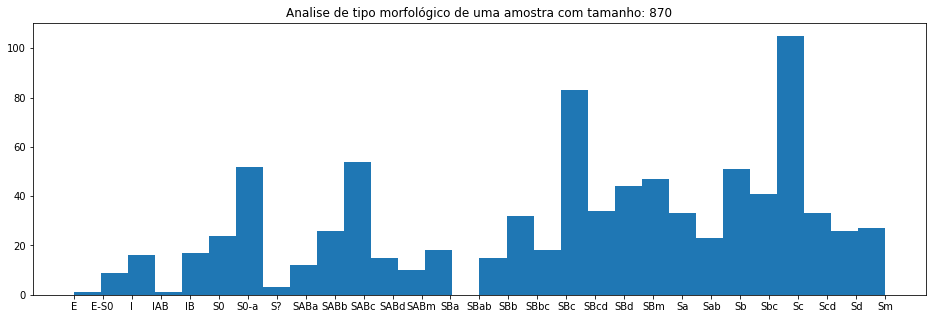

In [40]:
analise_espirais(column_type = s4g_comps_bar.type , plot=True)

Menos de 50% das galáxias com componente barra em sua decomposição são espirais barradas... 

Como essa fração se comporta ao olharmos para diferentes cortes de massa? Será que temos mais espirais barradas se olharmos para galáxias de maior massa?

In [25]:
#Os cortes de massa
s4g_m9_bar = s4g_comps_bar[s4g_comps_bar.mstar < 9] #massa menor que 10^9 -- galáxias anãs
s4g_m9_m10_bar = s4g_comps_bar[s4g_comps_bar.mstar >= 9][s4g_comps_bar.mstar < 10]
s4g_m10_bar = s4g_comps_bar[s4g_comps_bar.mstar >= 10]

/tmp/ipykernel_21848/1393710324.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  s4g_m9_m10_bar = s4g_comps_bar[s4g_comps_bar.mstar >= 9][s4g_comps_bar.mstar < 10]


### 71 galáxias anãs ($M < 10^9 Msun$)

Amostra de 71 galáxias

Em nossa amostra de:  71 galáxias temos:  62 galáxias espirais
onde:  44 possuem uma barra
sendo :  35 são barras fortes

Porcentagem de galaxias espirais barradas:  61.972
Porcentagem de galaxias espirais SB:  49.296




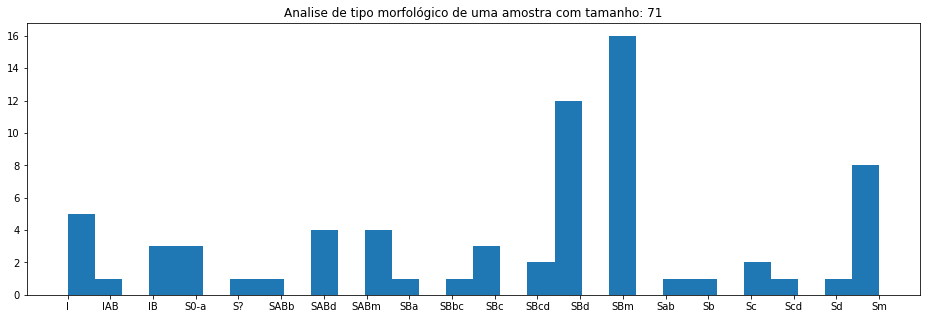

In [39]:
analise_espirais(column_type = s4g_m9_bar.type , plot=True)

### 446 galáxias ($10^9 Msun < M < 10^{10} Msun$) 

Amostra de 446 galáxias

Em nossa amostra de:  446 galáxias temos:  422 galáxias espirais
onde:  227 possuem uma barra
sendo :  177 são barras fortes

Porcentagem de galaxias espirais barradas:  50.897
Porcentagem de galaxias espirais SB:  39.686




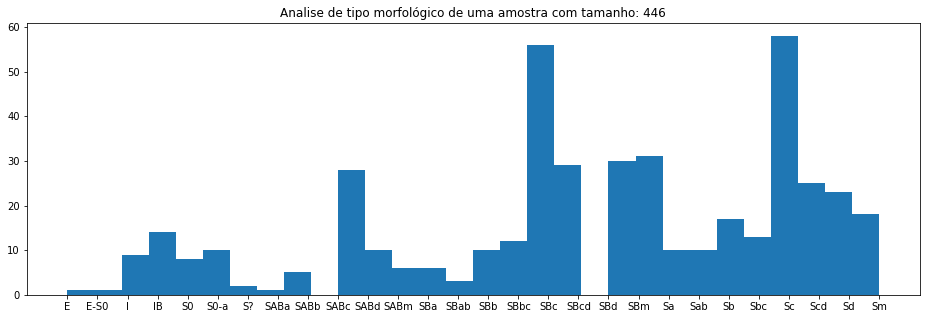

In [27]:
analise_espirais(column_type = s4g_m9_m10_bar.type , plot=True)

### 353 galáxias ($M > 10^{10} Msun$)

Amostra de 353 galáxias

Em nossa amostra de:  353 galáxias temos:  351 galáxias espirais
onde:  137 possuem uma barra
sendo :  79 são barras fortes

Porcentagem de galaxias espirais barradas:  38.810
Porcentagem de galaxias espirais SB:  22.380




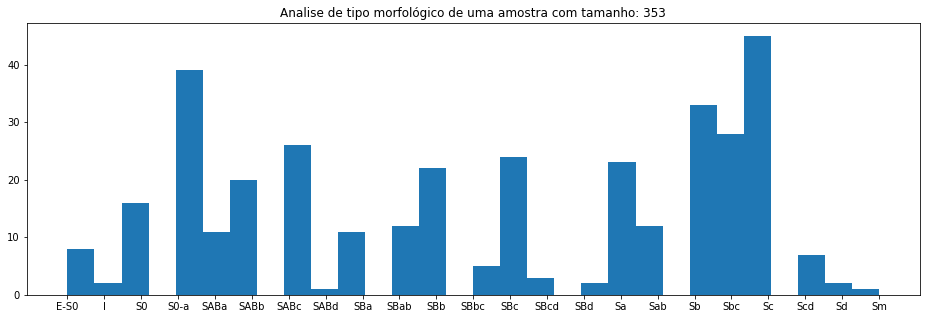

In [28]:
analise_espirais(column_type = s4g_m10_bar.type , plot=True)

### Massivas

Amostra de 799 galáxias

Em nossa amostra de:  799 galáxias temos:  773 galáxias espirais
onde:  364 possuem uma barra
sendo :  256 são barras fortes

Porcentagem de galaxias espirais barradas:  45.557
Porcentagem de galaxias espirais SB:  32.040




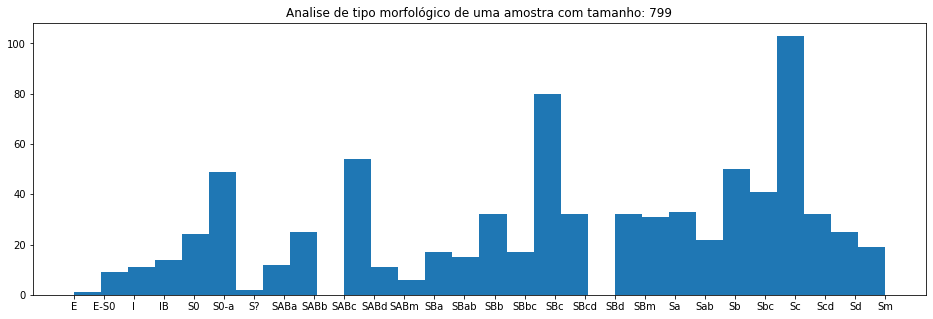

In [29]:
s4g_m9m_bar = s4g_comps_bar[s4g_comps_bar.mstar >= 9]
analise_espirais(column_type = s4g_m9m_bar.type , plot=True)

Então, olhando para as galáxias que possuem barra em sua decomposição, se considerarmos as massivas $M > 10^9 Msun$, vemos que em 45.6% das espirais massivas a barra é recuperada com a decomposição. 

Considerando a inclinação < 65 e ainda olhando para as massivas:

In [30]:
s4g_comps_bar_i65 = s4g_comps_bar[s4g_comps_bar.incl < 65]

print(s4g_comps_bar_i65)

          Name_1      Mod  Q    C  mstar  type  t_1   incl
4     ESO012-010    _dbar  5  BAR  9.632   SBd  7.7  26.82
8     ESO013-016   _dbarf  5  BAR  9.564   SBd  7.5  56.71
12    ESO026-001   _ndbar  5  BAR  9.373   SBc  5.9  30.39
16    ESO027-001   _bdbar  5  BAR  9.999   SBc  5.0  36.30
20    ESO048-017   _ndbar  5  BAR  9.202  SBcd  6.9  62.52
...          ...      ... ..  ...    ...   ...  ...    ...
4593    UGC12151    _dbar  5  BAR  9.314    IB  9.7  51.43
4611    UGC12681   _dbarf  5  BAR  9.043  SBbc  4.2  54.14
4615    UGC12707  _dbarfn  5  BAR  9.611   Sbc  3.9  57.72
4618    UGC12709    _dbar  5  BAR  9.528  SABm  8.7  58.74
4620    UGC12732    _dbar  5  BAR  8.703  SABm  8.7  26.57

[477 rows x 8 columns]


Amostra de 477 galáxias

Em nossa amostra de:  477 galáxias temos:  461 galáxias espirais
onde:  211 possuem uma barra
sendo :  135 são barras fortes

Porcentagem de galaxias espirais barradas:  44.235
Porcentagem de galaxias espirais SB:  28.302




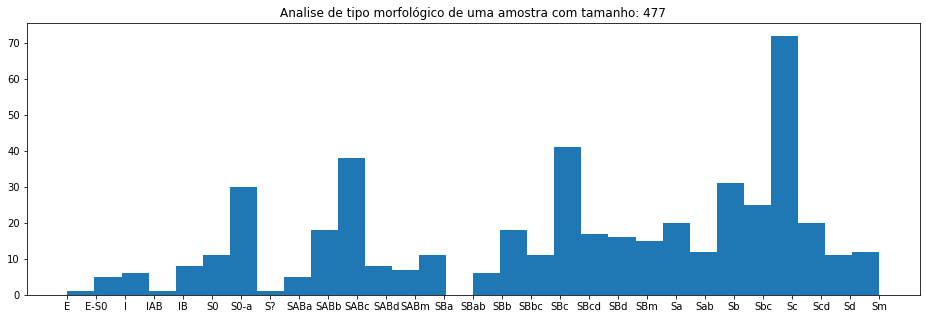

In [31]:
analise_espirais(column_type = s4g_comps_bar_i65.type , plot=True)

Continuamos recuperando poucas barras na decomposição para espirais barradas.

---- 

Por último, vamos olhar para a amostra de galáxias que uso para estudar distribuição de massa.

## Análise nas galáxias que estudamos a distribuição de massa

Essa amostra é bem menor e possui alguns cortes: inclinação < 65 (caracterizar bem a barra -- galáxias muito inclinadas dificultam a determinação de uma barra), possuir barra na decomposição, qualidade de decomposição = 5 (alguns fatores podem afetar a decomposição -- ex: objetos na frente da galáxia). 

. Tipo morfologico para diferentes cortes de massa -- Além de todas galáxias possuirem componente barra nessa amostra, elas tem boa qualidade de decomposição e inclinação ideal para uma boa determinação da barra. Quantas nessa amostra são espirais barradas?

. Histograma do tipo morfológico (type) -- Amostra completa e diferentes cortes de massa 

In [32]:
#Vamos fazer o corte de qualidade 5 e inclinação nas galáxias barradas

s4g_comps_bar_i65_q5 = s4g_comps_bar_i65[s4g_comps_bar_i65.Q == 5]

print(s4g_comps_bar_i65_q5)

          Name_1      Mod  Q    C  mstar  type  t_1   incl
4     ESO012-010    _dbar  5  BAR  9.632   SBd  7.7  26.82
8     ESO013-016   _dbarf  5  BAR  9.564   SBd  7.5  56.71
12    ESO026-001   _ndbar  5  BAR  9.373   SBc  5.9  30.39
16    ESO027-001   _bdbar  5  BAR  9.999   SBc  5.0  36.30
20    ESO048-017   _ndbar  5  BAR  9.202  SBcd  6.9  62.52
...          ...      ... ..  ...    ...   ...  ...    ...
4593    UGC12151    _dbar  5  BAR  9.314    IB  9.7  51.43
4611    UGC12681   _dbarf  5  BAR  9.043  SBbc  4.2  54.14
4615    UGC12707  _dbarfn  5  BAR  9.611   Sbc  3.9  57.72
4618    UGC12709    _dbar  5  BAR  9.528  SABm  8.7  58.74
4620    UGC12732    _dbar  5  BAR  8.703  SABm  8.7  26.57

[461 rows x 8 columns]


Minha amostra é um pouco menor que 461 galáxias devido ao corte de "possuir valor de distância" que é aplicado depois. Para nossa atual análise, esse corte não é necessário, então irei considerar essa amostra um pouco maior.

Amostra de 461 galáxias

Em nossa amostra de:  461 galáxias temos:  446 galáxias espirais
onde:  204 possuem uma barra
sendo :  130 são barras fortes

Porcentagem de galaxias espirais barradas:  44.252
Porcentagem de galaxias espirais SB:  28.200




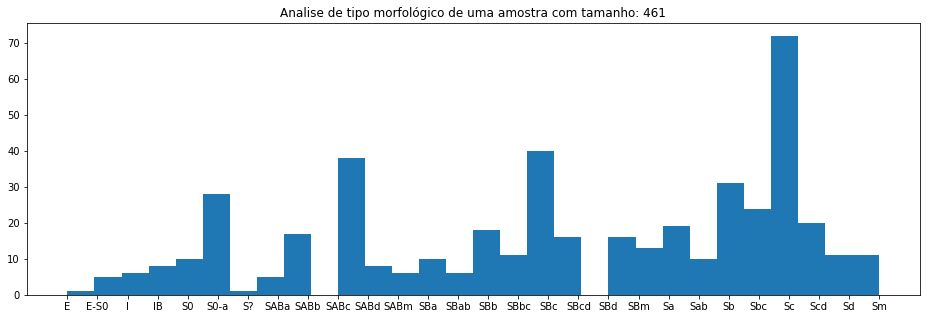

In [42]:
analise_espirais(column_type = s4g_comps_bar_i65_q5.type , plot=True)

In [43]:
#Os cortes de massa
s4g_m9_bar_i65_q5 = s4g_comps_bar_i65_q5[s4g_comps_bar_i65_q5.mstar < 9] #massa menor que 10^9 -- galáxias anãs
s4g_m9_m10_bar_i65_q5 = s4g_comps_bar_i65_q5[s4g_comps_bar_i65_q5.mstar >= 9][s4g_comps_bar.mstar < 10]
s4g_m10_bar_i65_q5 = s4g_comps_bar_i65_q5[s4g_comps_bar_i65_q5.mstar >= 10]

/tmp/ipykernel_21848/332559215.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  s4g_m9_m10_bar_i65_q5 = s4g_comps_bar_i65_q5[s4g_comps_bar_i65_q5.mstar >= 9][s4g_comps_bar.mstar < 10]


### 15 galáxias anãs ($M < 10^9 Msun$)

Amostra de 15 galáxias

Em nossa amostra de:  15 galáxias temos:  14 galáxias espirais
onde:  8 possuem uma barra
sendo :  4 são barras fortes

Porcentagem de galaxias espirais barradas:  53.333
Porcentagem de galaxias espirais SB:  26.667




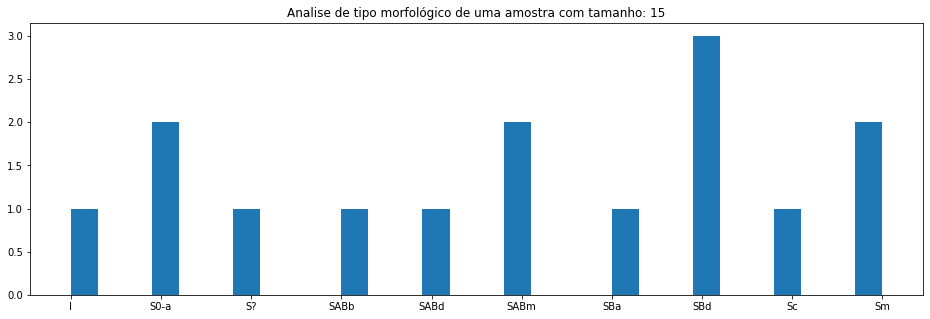

In [44]:
analise_espirais(column_type = s4g_m9_bar_i65_q5.type , plot=True)

### 224 galáxias ($10^9 Msun < M < 10^{10} Msun$) 

Amostra de 224 galáxias

Em nossa amostra de:  224 galáxias temos:  210 galáxias espirais
onde:  114 possuem uma barra
sendo :  77 são barras fortes

Porcentagem de galaxias espirais barradas:  50.893
Porcentagem de galaxias espirais SB:  34.375




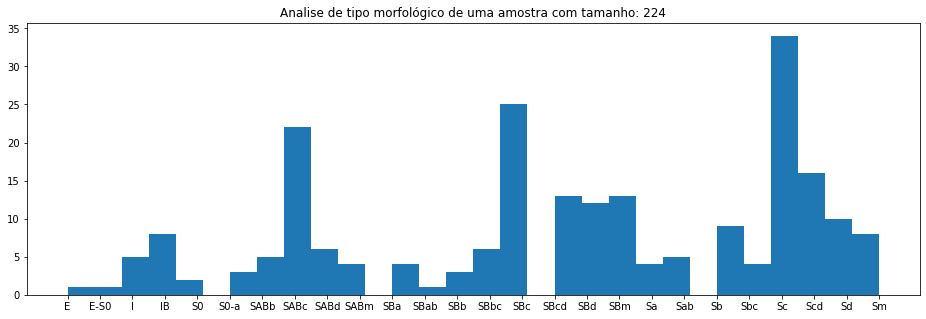

In [45]:
analise_espirais(column_type = s4g_m9_m10_bar_i65_q5.type , plot=True)

### 222 galáxias ($M > 10^{10} Msun$)

Amostra de 222 galáxias

Em nossa amostra de:  222 galáxias temos:  222 galáxias espirais
onde:  82 possuem uma barra
sendo :  49 são barras fortes

Porcentagem de galaxias espirais barradas:  36.937
Porcentagem de galaxias espirais SB:  22.072




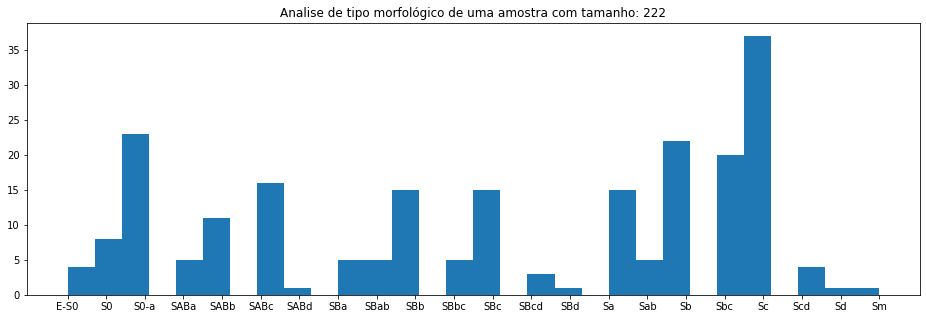

In [46]:
analise_espirais(column_type = s4g_m10_bar_i65_q5.type , plot=True)

### Amostra massiva M > 10^9 Msun

Amostra de 446 galáxias

Em nossa amostra de:  446 galáxias temos:  432 galáxias espirais
onde:  196 possuem uma barra
sendo :  126 são barras fortes

Porcentagem de galaxias espirais barradas:  43.946
Porcentagem de galaxias espirais SB:  28.251




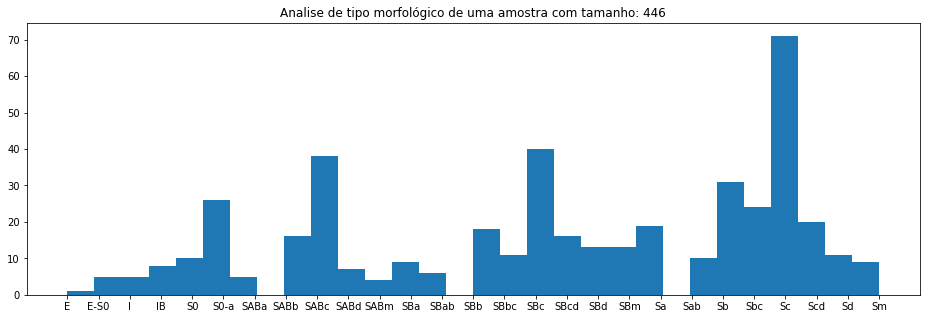

In [47]:
s4g_m9m_bar_i65_q5 = s4g_comps_bar_i65_q5[s4g_comps_bar_i65_q5.mstar >= 9]
analise_espirais(column_type = s4g_m9m_bar_i65_q5.type , plot=True)

Com isso vemos de uma forma geral que as barras são melhor recuperadas em espirais barradas com massa intermediária para baixa. Talvez em espirais de maior massa, componentes bojo acabem se ajustando melhor. 

Considerando que a decomposição utilizou GALFIT (e este ajusta equações ao perfil de brilho da componente) e foi feita para um número grande de galáxia, provavelmente a equipe preferil ajustar bem o modelo com os perfis de brilho que pareciam combinar melhor e acabaram não analisando tão detalhadamente se isso fazia sentido com a classificação do tipo morfológico. 

----

### Respondendo algumas questões importantes
 
- Ao fazer essa análise sabemos quantas barras recuperamos com a decomposição. Nem toda galáxia com componente barra possui barra? Temos componente barra em galáxias com tipo morfológico que não esperaríamos uma barra? O quanto a componente barra na decomposição é de fato fiel a galáxia possuir ou não barra? 

Olhando para galáxias com componente barra e considerando o critério de inclinação, 44% são espirais barradas massivas. 

Cerca de 50% das galáxias com componente barra de fato possuem uma barra em seu tipo morfológico.


- Estamos ficando mais com as SB?

Em boa parte dos casos vemos que as SB são maioria das espirais barradas, o que era esperado já que são barras mais fortes.

----

Como mencionado, o tipo morfológico foi feito ótico e a decomposição no Mid-IR. Provavelmente o tipo morfológico não iria mudar muito, talvez influenciasse de alguma forma. 

Essa análise poderia se estender e analisar o Hubble T Type e possivelmente poderia encontrar resultados um pouco diferentes. Inclusive poderiamos refazer a mesma análise, porém excluindo o tipo S0 (lenticulares) das espirais. 